In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])
V,I=np.loadtxt('stephan-const.dat',delimiter=',',unpack=True) #make a file (.txt works as well) and put all your data in 1 long column# 100 obs

In [3]:
#fitting
def f(x,a,b,c):
    return a*(x**b)+c

popt,pcov=curve_fit(f,V,I)

xFit=np.arange(0.1,12.5,0.1)


In [4]:
X=np.arange(0.1,4,0.01)
Y=[]
R=2
for i in X:
    Y.append(i/R)

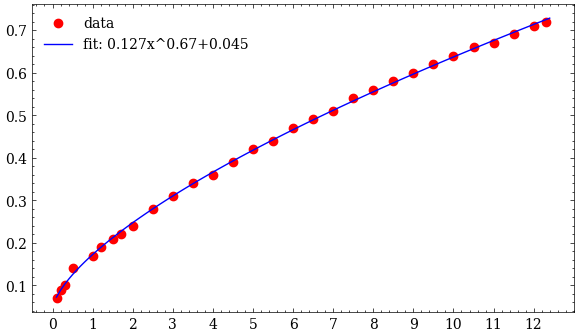

In [5]:
plt.figure(figsize=(7,4))
plt.plot(V,I,'ro',label='data')
#plt.plot(X,Y,'k-')
plt.xticks(np.arange(0,13,1))
x,y,z=popt[0],popt[1],popt[2]
str='fit: {}x^{}+{}'.format(f'{x:.3}',f'{y:.2}',f'{z:.2}')
plt.plot(xFit,f(xFit,*popt),'b-',label=str)
plt.legend(loc='upper left')
plt.show()

In [6]:
Rt=V/I

R=2.8
p=5.6*10**-8
k=R/p
Pt=Rt/k
a=0.0045
T=(1/a)*(((Pt/p)*(1+20*a))-1)


T=T+273.15
Pow=V*I
def f(x,a,b):
    return a*x+b
Px=np.log(Pow)[4:-1:]
Tx=np.log(T)[4:-1:] 

popt,pcov=curve_fit(f,Tx,Px)
xFit=np.arange(6.2,7.4,0.01)
popt

array([  4.03188066, -27.40675091])

In [14]:
k

50000000.0

In [10]:
Rt

array([ 1.42857143,  2.22222222,  3.        ,  3.57142857,  5.88235294,
        6.31578947,  7.14285714,  7.72727273,  8.33333333,  8.92857143,
        9.67741935, 10.29411765, 11.11111111, 11.53846154, 11.9047619 ,
       12.5       , 12.76595745, 13.26530612, 13.7254902 , 13.88888889,
       14.28571429, 14.65517241, 15.        , 15.32258065, 15.625     ,
       15.90909091, 16.41791045, 16.66666667, 16.90140845, 17.08333333])

In [11]:
Pt

array([2.85714286e-08, 4.44444444e-08, 6.00000000e-08, 7.14285714e-08,
       1.17647059e-07, 1.26315789e-07, 1.42857143e-07, 1.54545455e-07,
       1.66666667e-07, 1.78571429e-07, 1.93548387e-07, 2.05882353e-07,
       2.22222222e-07, 2.30769231e-07, 2.38095238e-07, 2.50000000e-07,
       2.55319149e-07, 2.65306122e-07, 2.74509804e-07, 2.77777778e-07,
       2.85714286e-07, 2.93103448e-07, 3.00000000e-07, 3.06451613e-07,
       3.12500000e-07, 3.18181818e-07, 3.28358209e-07, 3.33333333e-07,
       3.38028169e-07, 3.41666667e-07])

In [27]:
T

array([ 174.51054422,  243.16763668,  310.4515873 ,  359.88469388,
        559.79799253,  597.29369256,  668.84160998,  719.39819625,
        771.82724868,  823.32006803,  888.10135689,  941.45065359,
       1012.12707231, 1049.09627595, 1080.78416478, 1132.27698413,
       1155.28441405, 1198.48203758, 1238.2916122 , 1252.42689594,
       1286.75544218, 1318.71650246, 1348.5468254 , 1376.45261137,
       1402.61428571, 1427.19040404, 1471.20733239, 1492.72671958,
       1513.03374693, 1528.77169312])

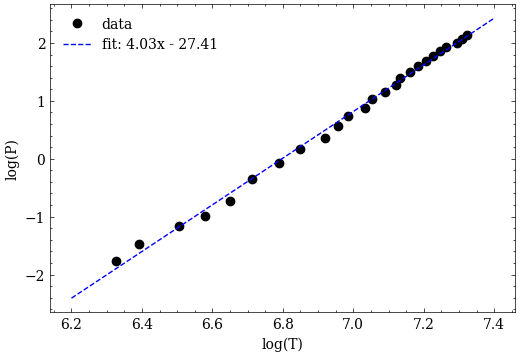

In [7]:
plt.figure(figsize=(6,4))
plt.plot(Tx,Px,'ko',label='data')
a,b=popt[0],-1*popt[1]
str1='fit: {}x - {}'.format(f'{a:.3}',f'{b:.4}')
plt.plot(xFit,f(xFit,*popt),'b--',label=str1)
plt.xlabel('log(T)')
plt.ylabel('log(P)')
plt.legend(loc='upper left')
plt.show()

In [8]:
popt

array([  4.03188066, -27.40675091])

In [9]:
pcov

array([[ 0.00230232, -0.01605201],
       [-0.01605201,  0.11211148]])

In [13]:
eA=np.exp(popt[1])
l=0.003
A=l/k

def SA(r,l):
    return np.pi*r*(2+r)
Ar=SA(np.sqrt(A/np.pi),1)
eA/Ar
"""Stephan const"""

4.55740691446438e-08

In [24]:
eA

1.2514091124647391e-12

In [23]:
dr=np.sqrt((18*10**-11)**2/(np.sqrt(A/np.pi))**2)
dr/np.sqrt(A/np.pi)
dr


4.11881054788696e-05